# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mohamad Ripal Perdiansyah
- **Email:** mohamadripal001@gmail.com
- **ID Dicoding:** mohamad_ripal

## **Menentukan Pertanyaan Bisnis**

1. Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?

2. Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?

3. Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

Sebelum memulai proyek, pastikan kita telah mengimport semua library yang kita butuhkan untuk mengerjakan proyeknya.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## **Data Wrangling**

### **Gathering Data**

**Insight:**
- Mengumpulkan data yang telah kita kumpulkan. Karena saya memilih **Bike Sharing Dataset**, maka saya mengimpor file **day.csv** dan **hr.csv**

#### **Data day**

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/mripalp/machine_learning/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Data hr**

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/mripalp/machine_learning/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

#### **Menilai day_df**

1. Mengecek tipe data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



**Insight:**
- Terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada missing values

In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Disimpulkan bahwa tabel day_df tidak ada missing values

3. Mengecek apakah ada duplicate data

In [6]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


**Insight:**
- tabel day_df terdapat 0 data yang *double*, artinya semua data bersifat unik.

4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
-  Tidak ada keanehan pada nilai statistiknya.

#### **Menilai hr_df**

1. Mengecek info hr_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada missing values

In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Disimpulkan bahwa tabel hr_df tidak ada missing values

3. Mengecek apakah ada duplicate data

In [10]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
-  Tidak ada keanehan pada nilai statistiknya.

### **Cleaning Data**

1. Menghapus tabel yang tidak diperlukan

Sebelum kita masuk ke tahapan-tahapan selanjutnya, kita sekarang akan menghapus terlebih dahulu tabel **hr**. Alasannya adalah karena kita tidak relevan dengan pertanyaan bisnis yang sudah kita tetapkan, dan juga sebenarnya tabel hr dan day itu bedanya hanya di kolom hrnya saja, selebihnya sama semua.

In [12]:
del hour_df

2. Menghapus beberapa kolom yang tidak akan digunakan

Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

In [13]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah beberapa detail tentang kolom

Merubah nama kolom dan tipe data diskrit menjadi bentuk kategorikal

In [14]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [15]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubah tipe data ke kategorikal
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## **Exploratory Data Analysis (EDA)**

### **Eksplorasi Data day_df**

1. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca

In [18]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-18-c87e0d584980>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

**Insight:**
- Penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung.
- Penyewa sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

2. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan

In [19]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-19-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

**Insight:**
- Bulan dengan rata-rata terbesar dan jumlah terbanyak adalah bulan **Juni**
- Bulan dengan rata-rata terkecil dan jumlah terkecil adalah bulan **Januari**.

3. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday

In [20]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-20-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

**Insight:**
- Penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

4. Bandingkan penyewa sepeda pada saat hari kerja (weekday) vs akhir pekan (weekend)

In [21]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

<ipython-input-21-7bfa45d53d30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

**Insight:**
- Rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan workingday

In [22]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-22-fb984321fedb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

**Insight:**
- Jumlah penyewaan sepeda terbesar jatuh kepada workingday atau hari kerja dibandingkan dengan hari non-workingday.

6. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season

In [23]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-23-176def68a8e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

**Insight:**
- Penyewa yang paling banyak adalah pada musim gugur (Fall),
- Penyewa yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?**

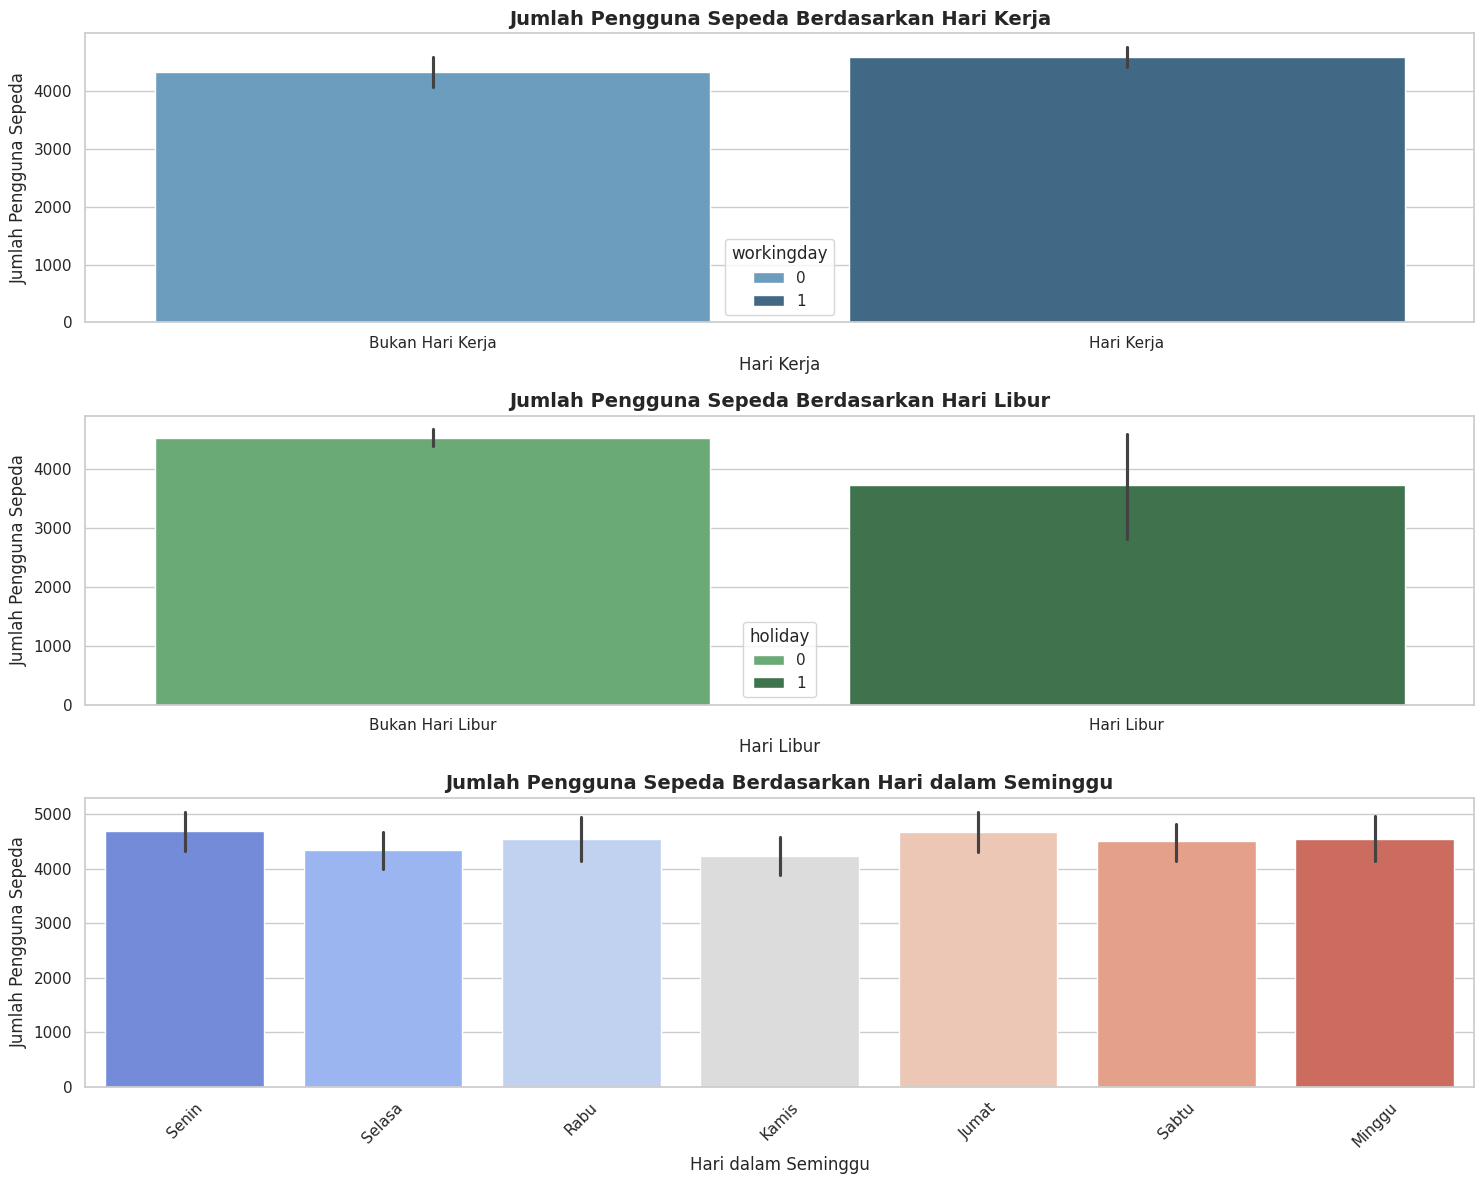

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    hue='workingday',
    data=day_df,
    palette="Blues_d",
    ax=axes[0],
)
axes[0].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari Kerja', fontsize=14, weight='bold')
axes[0].set_xlabel('Hari Kerja', fontsize=12)
axes[0].set_ylabel('Jumlah Pengguna Sepeda', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Bukan Hari Kerja', 'Hari Kerja'], fontsize=11)

# Berdasarkan holiday
sns.barplot(
    x='holiday',
    y='count',
    hue='holiday',
    data=day_df,
    palette="Greens_d",
    ax=axes[1],
)
axes[1].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari Libur', fontsize=14, weight='bold')
axes[1].set_xlabel('Hari Libur', fontsize=12)
axes[1].set_ylabel('Jumlah Pengguna Sepeda', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Bukan Hari Libur', 'Hari Libur'], fontsize=11)

# Berdasarkan weekday
sns.barplot(
    x='weekday',
    y='count',
    hue='weekday',
    data=day_df,
    palette="coolwarm",
    ax=axes[2],
)
axes[2].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari dalam Seminggu', fontsize=14, weight='bold')
axes[2].set_xlabel('Hari dalam Seminggu', fontsize=12)
axes[2].set_ylabel('Jumlah Pengguna Sepeda', fontsize=12)
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], fontsize=11, rotation=45)

plt.tight_layout()
plt.show()

**Insight:**
- Jumlah penyewa sepeda lebih banyak pada hari kerja (yakni Senin - Jumat) daripada akhir pekan (yakni Sabtu dan Minggu). 0 menandakan akhir pekan dan 1 menandakan hari kerja.
- Jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).
- Jumlah penyewa sepeda pada hari Jumat ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

### **Pertanyaan 2: Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?**

<ipython-input-25-e3e9bae5d24b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


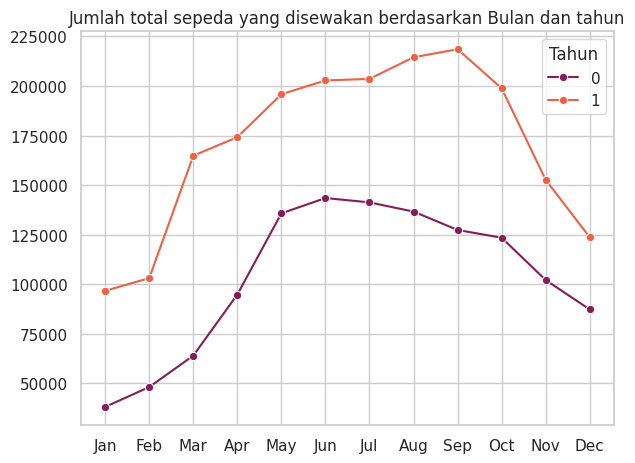

In [25]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

**Insight:**
- Pada tahun 2012 (yang diwakili oleh angka 1) jelas menang unggul baik dari januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.

### **Pertanyaan 3: Apakah ada peran cuaca terhadap jumlah pengguna sepeda?**

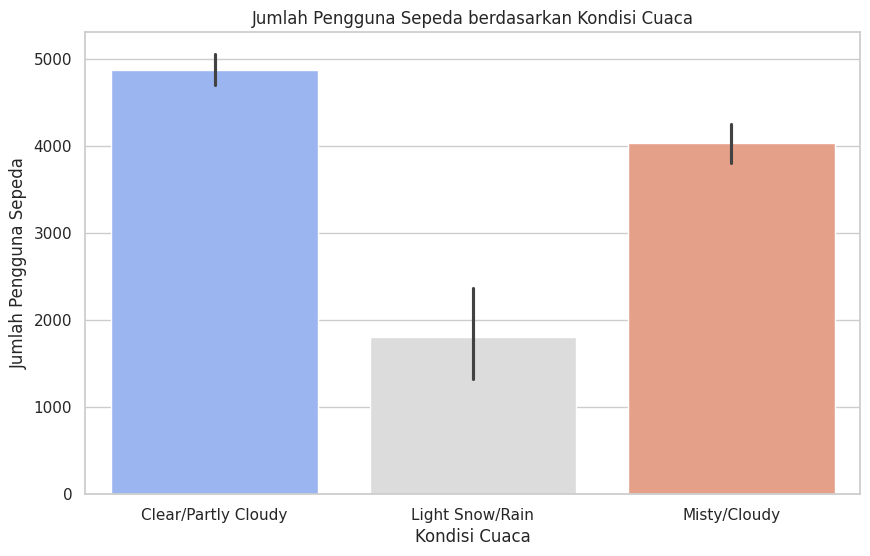

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    hue='weather_cond',
    data=day_df,
    palette="coolwarm",
)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- Terdapat hubungan antara kondisi cuaca dan penyewa sepeda, kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca berkabut/mendung, dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.


## **Conclusion**

### **Conclusion Pertanyaan 1**
- Diagram menunjukkan bahwa rata-rata jumlah pengguna sepeda pada **hari kerja (working days)** sedikit lebih tinggi dibandingkan hari libur, yaitu sekitar **4.500 pengguna**.
- Pada hari libur, jumlah pengguna sepeda sedikit lebih rendah, tetapi tetap signifikan, berada di angka sekitar **4.200 pengguna**.
- Penggunaan sepeda sepanjang minggu cukup merata, dengan puncak jumlah pengguna terjadi pada **Jumat (Friday)**, yaitu sekitar **4.800 pengguna**.
- Hari lainnya seperti Sabtu (Saturday), Minggu (Sunday), dan Senin (Monday) memiliki angka yang sedikit lebih rendah, rata-rata sekitar **4.200–4.500 pengguna**.

**Kesimpulan:** Meskipun ada sedikit variasi, sepeda digunakan secara merata sepanjang minggu, baik pada hari kerja maupun hari libur. Tidak ada perbedaan signifikan yang menunjukkan bahwa sepeda hanya digunakan untuk tujuan rekreasi atau kerja.

<br>
<br>

---

### **Conclusion Pertanyaan 2**
- **Tahun 2011 vs Tahun 2012**:
  - Diagram menunjukkan bahwa penggunaan sepeda di **tahun 2012 lebih unggul** dibandingkan tahun 2011.
  - Pada puncaknya, penggunaan sepeda di 2012 mencapai lebih dari **225.000 pengguna** pada bulan **Juni hingga September**, sedangkan di tahun 2011, penggunaan sepeda tertinggi hanya sekitar **150.000 pengguna** pada bulan yang sama.

- **Musim dan Bulan**:
  - Penggunaan sepeda meningkat secara bertahap dari bulan Januari hingga Juni, mencapai puncaknya selama Juni hingga September.
  - Penurunan drastis terlihat terutama pada bulan Desember di mana jumlah pengguna turun menjadi sekitar **125.000 pengguna di 2012** dan **90.000 pengguna di 2011**.

**Kesimpulan:** Penggunaan sepeda jauh lebih tinggi di tahun 2012, dengan puncak penggunaan terjadi selama musim panas. Faktor cuaca hangat tampaknya memengaruhi peningkatan aktivitas bersepeda.

<br>
<br>

---

### **Conclusion Pertanyaan 3**
- **Kondisi Cuaca Cerah (Clear/Partly Cloudy)**:
  - Jumlah pengguna tertinggi terjadi pada kondisi cerah atau sebagian berawan, dengan rata-rata **5.000 pengguna**.
  
- **Kondisi Cuaca Buruk (Light Snow/Rain)**:
  - Jumlah pengguna berkurang drastis pada kondisi hujan ringan atau salju ringan, dengan rata-rata hanya **2.000 pengguna**.
  
- **Kondisi Berkabut atau Mendung (Misty/Cloudy)**:
  - Pengguna sepeda dalam kondisi ini berada di angka menengah, sekitar **4.000 pengguna**, menunjukkan bahwa kondisi ini tidak terlalu memengaruhi keputusan pengguna untuk bersepeda.

**Kesimpulan:** Cuaca cerah sangat mendukung aktivitas bersepeda, sementara hujan ringan atau salju mengurangi minat secara signifikan. Hal ini menegaskan bahwa cuaca merupakan faktor utama yang memengaruhi jumlah pengguna sepeda.